# Reinforcement Learning - Toy examples with Gym

## FrozenLake

In this Notebook, we will implement $SARSA$ and $Q-Learning$ methods to solve the FrozenLake8x8 environment (https://gym.openai.com/envs/FrozenLake-v0/), using and comparing different policies for exploration. Note that it is a stochastic envivonment since, as mentioned in the documentation, "the ice is slippery, so you won't always move in the direction you intend".

Both algorithms update a tabular estimate of the $Q-function$ using a following update rule:
* $SARSA$ algorithm is an on-policy method using:
$$Q_{t+1}(s_t,a_t) \leftarrow Q_t(s_t,a_t) + \alpha (r_t + \gamma Q_t(s_{t+1}, a_{t+1}) - Q_t(s_t,a_t))$$

* $Q-Learning$ algorithm is an off-policy method using:
$$Q_{t+1}(s_t,a_t) \leftarrow Q_t(s_t,a_t) + \alpha (r_t + \gamma \max_b Q_t(s_{t+1}, b) - Q_t(s_t,a_t))$$

For exploration, we will compare performances between:
* $\epsilon$-greedy policy with a fixed $\epsilon$.
* $\epsilon$-greedy policy with a decaying $\epsilon$.
* softmax exploration assigning a probability for an action to be
performed according to the following rule:
$$P(a_i \vert s) = \frac{e^{\frac{1}{\tau}Q(s,a_j)}}{\sum_j e^{\frac{1}{\tau}Q(s,a_j)}}$$

In [4]:
import sys
sys.path.append("../") # go to parent dir
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import pandas as pd
from auxModules.TD import *
import gym

In [23]:
envName = "FrozenLake-v0"
env = gym.make(envName)

c:\environments\drl_env\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


### SARSA

Wall time: 803 ms


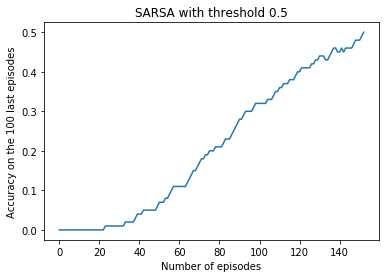

In [6]:
%%time
w = 100
threshold = 0.5
q_table, histAcc, episode = SARSATh(env, threshold, softmax = True, window=w, tau = 0.01)
plt.plot(np.arange(len(histAcc)), histAcc)

plt.xlabel("Number of episodes")
plt.ylabel("Accuracy on the {} last episodes".format(w))
plt.title("SARSA with threshold {}".format(threshold))

### $Q$-Learning

195
Wall time: 1.18 s


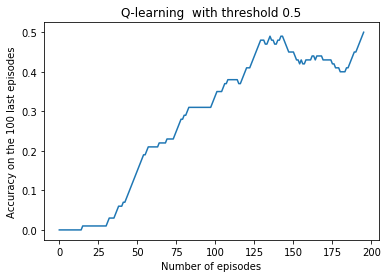

In [7]:
%%time
w = 100
threshold = 0.5
q_table, histAcc, episode = QLearningTh(env, threshold, softmax = True, window=w, tau = 0.01)
print(episode)
plt.plot(np.arange(len(histAcc)), histAcc)

plt.xlabel("Number of episodes")
plt.ylabel("Accuracy on the {} last episodes".format(w))
plt.title("Q-learning  with threshold {}".format(threshold))

In [10]:
%%time
testPolicy(env, q_table, nEpisode = 1000)

Wall time: 1.23 s


0.737

## Compare methods

In [11]:
recap = pd.DataFrame (columns = ["Accuracy - SARSA", "Nb episodes - SARSA", "Accuracy - QLearning", "Nb episodes - QLearning"])

nEpisodeAccuracy = 1000
threshold = 0.78

### $\epsilon$-greedy with fixed $\epsilon$

In [12]:
n = 5
Eps = 0.1 * np.arange(1, 10, 2)

for eps in tqdm(Eps):
    sarsa = 0
    sarsaEpisode = 0
    ql = 0
    qEpisode = 0
    for _ in range(n):
        q_table, histAcc, qEp = QLearningTh(env, threshold, epsilon0 = eps, decreaseRate=1)
        ql += testPolicy(env, q_table, nEpisodeAccuracy)
        qEpisode += qEp
        q_table, histAcc, sarsaEp  = SARSATh(env, threshold, epsilon0 = eps, decreaseRate=1)
        sarsa += testPolicy(env, q_table, nEpisodeAccuracy)
        sarsaEpisode += sarsaEp
    sarsa /= n
    sarsaEpisode /= n
    qEpisode /= n
    ql /= n
    recap.loc["Fixed $\epsilon$ : $\epsilon$ = {}".format(round(eps,2))] = [sarsa, sarsaEpisode, ql, qEpisode]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [06:32<00:00, 83.46s/it]


In [19]:
recap

,Accuracy - SARSA,Nb episodes - SARSA,Accuracy - QLearning,Nb episodes - QLearning
Fixed $\epsilon$ : $\epsilon$ = 0.1,0.7422,717.2,0.7394,746.2
Fixed $\epsilon$ : $\epsilon$ = 0.3,0.7364,494.6,0.7198,501.0
Fixed $\epsilon$ : $\epsilon$ = 0.5,0.7320,367.2,0.7256,534.8
Fixed $\epsilon$ : $\epsilon$ = 0.7,0.7400,1008.2,0.7430,927.4
Fixed $\epsilon$ : $\epsilon$ = 0.9,0.7340,749.2,0.7366,869.4


### $\epsilon$-greedy with decaying $\epsilon$

In [20]:
n = 5
DR = [0.9, 0.99, 0.999]
eps = 0.9

for dr in tqdm(DR):
    sarsa = 0
    sarsaEpisode = 0
    ql = 0
    qEpisode = 0
    for _ in range(n):
        q_table, histAcc, qEp = QLearningTh(env, threshold, epsilon0 = eps, decreaseRate=dr)
        ql += testPolicy(env, q_table, nEpisodeAccuracy)
        qEpisode += qEp
        q_table, histAcc, sarsaEp  = SARSATh(env, threshold, epsilon0 = eps, decreaseRate=dr)
        sarsa += testPolicy(env, q_table, nEpisodeAccuracy)
        sarsaEpisode += sarsaEp
    sarsa /= n
    sarsaEpisode /= n
    qEpisode /= n
    ql /= n
    recap.loc["Decaying-$\epsilon$ : decaying rate = {}".format(dr)] = [sarsa, sarsaEpisode, ql, qEpisode]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [04:17<00:00, 90.64s/it]


In [21]:
recap

,Accuracy - SARSA,Nb episodes - SARSA,Accuracy - QLearning,Nb episodes - QLearning
Fixed $\epsilon$ : $\epsilon$ = 0.1,0.7422,717.2,0.7394,746.2
Fixed $\epsilon$ : $\epsilon$ = 0.3,0.7364,494.6,0.7198,501.0
Fixed $\epsilon$ : $\epsilon$ = 0.5,0.7320,367.2,0.7256,534.8
Fixed $\epsilon$ : $\epsilon$ = 0.7,0.7400,1008.2,0.7430,927.4
Fixed $\epsilon$ : $\epsilon$ = 0.9,0.7340,749.2,0.7366,869.4
Decaying-$\epsilon$ : decaying rate = 0.9,0.7342,682.4,0.7408,914.6
Decaying-$\epsilon$ : decaying rate = 0.99,0.7240,1009.0,0.7392,588.6
Decaying-$\epsilon$ : decaying rate = 0.999,0.7132,525.4,0.7350,640.2


### Softmax

In [22]:
n = 5

for t in tqdm([1, 0.1, 0.01, 0.001]):
    sarsa = 0
    sarsaEpisode = 0
    ql = 0
    qEpisode = 0
    for _ in range(n):
        q_table, histAcc, qEp = QLearningTh(env, threshold, softmax = True, tau = t)
        ql += testPolicy(env, q_table, nEpisodeAccuracy)
        qEpisode += qEp
        q_table, histAcc, sarsaEp  = SARSATh(env, threshold, softmax = True, tau = t)
        sarsa += testPolicy(env, q_table, nEpisodeAccuracy)
        sarsaEpisode += sarsaEp
    sarsa /= n
    sarsaEpisode /= n
    qEpisode /= n
    ql /= n
    recap.loc["Softmax : $\tau$ = {}".format(t)] = [sarsa, sarsaEpisode, ql, qEpisode]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [14:53<00:00, 212.18s/it]


In [24]:
recap.to_csv("output/recap_stochastic" + envName + ".csv")